In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
plt.style.use('ggplot')

In [2]:
with open('../Intern Project/20200308-POR-NSH_79421577-d3b0-4ff7-95b8-8dbbaa29d49b_SecondSpectrum_Data.jsonl') as f:
    lines = f.read().splitlines()

In [3]:
type(lines)

list

In [4]:
df_initial = pd.DataFrame(lines)
df_initial.columns = ['json_element']

In [5]:
df_initial.head()

,json_element
0,"{""period"": 1, ""frameIdx"": 0, ""gameClock"": 0.0,..."
1,"{""period"": 1, ""frameIdx"": 1, ""gameClock"": 0.04..."
2,"{""period"": 1, ""frameIdx"": 2, ""gameClock"": 0.08..."
3,"{""period"": 1, ""frameIdx"": 3, ""gameClock"": 0.12..."
4,"{""period"": 1, ""frameIdx"": 4, ""gameClock"": 0.16..."


In [6]:
df_final = pd.json_normalize(df_initial['json_element'].apply(json.loads))

In [7]:
df_final['homePlayers'][0]

[{'playerId': '41004', 'number': 33, 'xyz': [25.16, 9.63, 0.0], 'speed': 0.0},
 {'playerId': '55820', 'number': 10, 'xyz': [0.79, -19.33, 0.0], 'speed': 0.0},
 {'playerId': '55817', 'number': 8, 'xyz': [-0.12, 0.58, 0.0], 'speed': 0.0},
 {'playerId': '96622', 'number': 21, 'xyz': [11.26, -0.95, 0.0], 'speed': 0.0},
 {'playerId': '131840',
  'number': 15,
  'xyz': [15.19, 28.62, 0.0],
  'speed': 0.0},
 {'playerId': '148712', 'number': 23, 'xyz': [0.69, 18.14, 0.0], 'speed': 0.0},
 {'playerId': '179298', 'number': 7, 'xyz': [10.67, -9.59, 0.0], 'speed': 0.0},
 {'playerId': '45092', 'number': 4, 'xyz': [15.91, -19.61, 0.0], 'speed': 0.0},
 {'playerId': '137415', 'number': 9, 'xyz': [0.39, -9.97, 0.0], 'speed': 0.0},
 {'playerId': '111806', 'number': 12, 'xyz': [42.79, 0.03, 0.0], 'speed': 0.0},
 {'playerId': '85417',
  'number': 13,
  'xyz': [24.55, -10.02, 0.0],
  'speed': 0.0}]

In [8]:
#df_final.to_csv('../data/SecondSpectrum_Data.csv')

In [9]:
df_final.shape

(143165, 10)

## Finished reading in Second Spectrum Tracking Data and saved as csv

In [2]:
with open('../Intern Project/20200308-POR-NSH_79421577-d3b0-4ff7-95b8-8dbbaa29d49b_SecondSpectrum_Metadata.json', 'r') as f:
        j = json.load(f)

In [5]:
home_players = pd.DataFrame(j['homePlayers'])

away_players = pd.DataFrame(j['awayPlayers'])

home_players['opponent'] = 'home'
away_players['opponent'] = 'away'

players_df = pd.concat((home_players, away_players), axis = 0).reset_index(drop=True)

In [6]:
players_df

,name,number,position,ssiId,optaId,optaUuid,opponent
0,D. Valeri,8,CAM,08346d02-6258-405c-85c9-92691a0bdc2d,55817,e5d62a8i9q48nxddohhp80r11,home
1,J. Cascante,18,SUB,178181f0-a169-4ad8-934b-ad8644181d75,181958,4d6cfs28p6vb6q1ijkw3dks7p,home
2,M. Farfan,32,SUB,1e018034-69b7-4e51-ae87-4017f8e8cb60,242130,4w21suigchse7vkzgbl98dt61,home
3,D. Chara,21,LDM,2ea2f6bb-49c4-4cef-bdad-20b34709e0f2,96622,b4etfnmz4dzoa4r9g0403catx,home
4,A. Polo,7,RDM,4e64f133-da6d-4eba-8c69-6b5d5371c584,179298,9i3zr46xdmby55ni0pftgz7it,home
5,L. Mabiala,33,RCB,543a7a11-d5e5-4e3a-818c-d43644c813d3,41004,4j2nh9w9r59fay6i6zk82lsd1,home
6,A. Ivacic,31,SUB,63656518-3ce5-4f66-b7a7-e944689c82fc,151534,98hmqopt3v7vhg6k2zx0q81qt,home
7,D. Zuparic,13,LCB,6eb2425b-ad02-43f6-958d-fedee82fd0ac,85417,czfus91j2yrgi45qdgib0yq51,home
8,C. Paredes,22,SUB,7efb81ed-14ea-4b0b-aa8f-e5e5b1796fe1,217784,2vi0jnzpu8uxqpkdwo0xcl2p5,home
9,J. Villafana,4,LB,96f4e2a2-ceec-4c8f-9a6d-611a96e63019,45092,8aaz5w3sc3lj7asgiodmochqt,home


In [7]:
#players_df.to_csv('../players_csv')

In [13]:
print('Game Details')
print('-----------------------------------------------------')
print('Opponents                 : {}'.format(j['description'].split(':')[0]))
print('Date                      : {}-{}-{}'.format(j['year'], j['month'], j['day']))
print('Home Score                : {}'.format(j['homeScore']))
print('Away Score                : {}'.format(j['awayScore']))
print('Pitch Length and Width    : {} by {}'.format(j['pitchLength'], j['pitchWidth']))
print('Frames per Second         : {}'.format(j['fps']))
print('\n')
print('Periods')
print('-----------------------------------------------------')
print('Period 1 Start Frame      : {}'.format(j['periods'][0]['startFrameClock']))
print('Period 1 End Frame        : {}'.format(j['periods'][0]['endFrameClock']))
print('Period 1 Start Frame Index: {}'.format(j['periods'][0]['startFrameIdx']))
print('Period 1 End Frame Index  : {}'.format(j['periods'][0]['endFrameIdx']))
print('Home Team Kick off        : {}'.format(j['periods'][0]['homeAttPositive']))
print('Period 2 Start Frame      : {}'.format(j['periods'][1]['startFrameClock']))
print('Period 2 End Frame        : {}'.format(j['periods'][1]['endFrameClock']))
print('Period 2 Start Frame Index: {}'.format(j['periods'][1]['startFrameIdx']))
print('Period 2 End Frame Index  : {}'.format(j['periods'][1]['endFrameIdx']))
print('Home Team Kick off        : {}'.format(j['periods'][1]['homeAttPositive']))
print('\n')
print('Data Information')
print('-----------------------------------------------------')
print('ssiIDd                    : {}'.format(j['ssiId']))
print('Opta Id                   : {}'.format(j['optaId']))
print('Opta Uuid                 : {}'.format(j['optaUuid']))
print('Home SsiId                : {}'.format(j['homeSsiId']))
print('Home Opta Id              : {}'.format(j['homeOptaId']))
print('Home Opta Uuid            : {}'.format(j['homeOptaUuid']))
print('Away SsiId                : {}'.format(j['awaySsiId']))
print('Away Opta Id              : {}'.format(j['awayOptaId']))
print('Away Opta Uuid            : {}'.format(j['awayOptaUuid']))


Game Details
-----------------------------------------------------
Opponents                 : POR - NSH 
Date                      : 2020-3-8
Home Score                : 1
Away Score                : 0
Pitch Length and Width    : 100.8888 by 68.58
Frames per Second         : 25.0


Periods
-----------------------------------------------------
Period 1 Start Frame      : 1583709073745
Period 1 End Frame        : 1583711849825
Period 1 Start Frame Index: 0
Period 1 End Frame Index  : 69402
Home Team Kick off        : False
Period 2 Start Frame      : 1583712777785
Period 2 End Frame        : 1583715728225
Period 2 Start Frame Index: 69403
Period 2 End Frame Index  : 143164
Home Team Kick off        : True


Data Information
-----------------------------------------------------
ssiIDd                    : 79421577-d3b0-4ff7-95b8-8dbbaa29d49b
Opta Id                   : 2044262
Opta Uuid                 : bc7x6a8sdcx7g13iih3utgei2
Home SsiId                : d6bef879-bce8-4fd9-a816-dd9b31

## Finished reading in Second Spectrum Game MetaData with printed results and dataframes

In [14]:
with open('../Intern Project/20200308-POR-NSH_79421577-d3b0-4ff7-95b8-8dbbaa29d49b_SecondSpectrum_Insight.jsonl') as f:
    lines2 = f.read().splitlines()

In [15]:
new_json = []
for line in lines2:
    new_json.append(json.loads(line))

In [16]:
opta_events = []
marking_events = []
for json in new_json:
    if json['optaEvent'] == None:
        marking_events.append(json)
        
    elif json['2sMarking'] == None:
        opta_events.append(json)
        
    else:
        marking_events.append(json)
        opta_events.append(json)

In [17]:
df_opta_initial = pd.DataFrame(opta_events)
df_marking_initial = pd.DataFrame(marking_events)

In [18]:
df_opta = pd.json_normalize(df_opta_initial['optaEvent'])
df_marking = pd.json_normalize(df_marking_initial['2sMarking'])

In [19]:
#df_opta.to_csv('../opta_data.csv')
#df_marking.to_csv('../marking_data.csv')

## Inital Plot of frame with player locations and ball locations

In [20]:
def plotting_player_location_frame(frame_number:int):
    
    lst_home_start = df_final['homePlayers'][frame_number]
    lst_away_start = df_final['awayPlayers'][frame_number]
    
    array = np.empty((11, 3))
    array2 = np.empty((11, 3))

    for i, (player_home, player_away) in enumerate(zip(lst_home_start, lst_away_start)):
        array[i][0] = player_home['xyz'][0]
        array[i][1] = player_home['xyz'][1]
        array[i][2] = player_home['xyz'][2]

        array2[i][0] = player_away['xyz'][0]
        array2[i][1] = player_away['xyz'][1]
        array2[i][2] = player_away['xyz'][2]
    
    ball_x, ball_y, ball_z = df_final['ball.xyz'][frame_number]
    ball_posession = df_final['lastTouch'][frame_number]
    if ball_posession == 'away':
        color_ = 'orangered'
    else:
        color_ = 'dodgerblue'
    
    fig, ax = plt.subplots(figsize=(19, 18))
    
    img = plt.imread('../printable-soccer-field-diagram.png')
    ax.imshow(img, extent=(-51.44, 51.44, -34.29, 34.29))
    plt.scatter(array[:, 0], array[:, 1], s=150, label='Home Team', color='dodgerblue')
    plt.scatter(array2[:, 0],  array2[:, 1], s=150, label='Away Team', color='orangered')
    plt.scatter(ball_x, ball_y, marker='*', s=350, color=color_, edgecolors='black', linewidths=1)
    plt.xticks([])
    plt.yticks([])
    plt.legend(loc='upper center', fontsize='large')
    print('Time of Frame: {:2.2f} minutes'.format(df_final['gameClock'][frame_number] / 25))

Time of Frame: 0.80 minutes


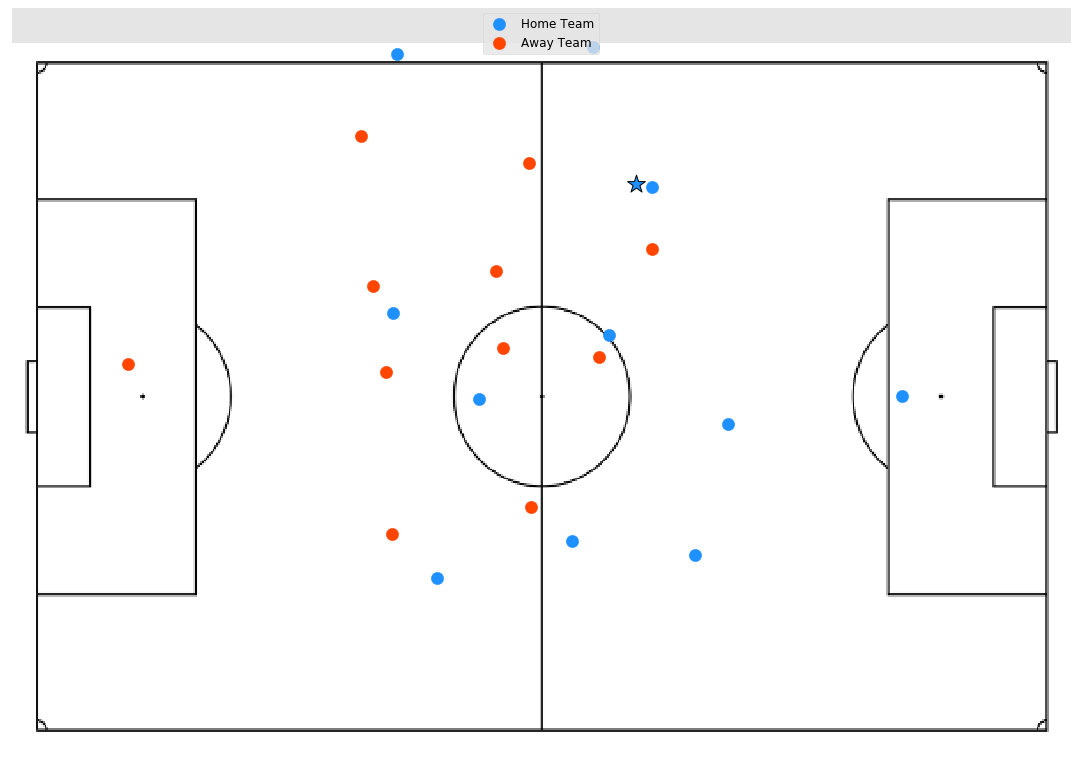

In [22]:
plotting_player_location_frame(500)